In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

In [58]:
seed = 7
np.random.seed(seed)

In [59]:
# Load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print X_train.shape, X_test.shape
print y_train.shape, y_test.shape

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [60]:
# Flatten 28*28 images to a 784 vector for each image
pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], pixels).astype('float32')
print pixels

# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

print X_train.shape, y_train.shape

784
(60000, 784) (60000,)


In [61]:
# One hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_op = y_test.shape[1]
print num_op

10


<h1> # Feed Forward Neural Network </h1>

In [66]:
def base_model():
    # create model
    model = Sequential()
    model.add(Dense(pixels, input_dim=pixels, init='normal', activation='relu'))
    model.add(Dense(pixels/2, activation='relu'))
    model.add(Dense(pixels/4, activation='relu'))
    model.add(Dense(num_op, init='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [67]:
# Build the model
mlp_m = base_model()

In [68]:
mlp_m.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_25 (Dense)                 (None, 784)           615440      dense_input_6[0][0]              
____________________________________________________________________________________________________
dense_26 (Dense)                 (None, 392)           307720      dense_25[0][0]                   
____________________________________________________________________________________________________
dense_27 (Dense)                 (None, 196)           77028       dense_26[0][0]                   
____________________________________________________________________________________________________
dense_28 (Dense)                 (None, 10)            1970        dense_27[0][0]                   
Total params: 1002158
_____________________________________________________________________

In [69]:
# Fit the model
mlp = mlp_m.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=256, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
0s - loss: 1.9251 - acc: 0.4899 - val_loss: 1.3523 - val_acc: 0.7246
Epoch 2/30
0s - loss: 0.9097 - acc: 0.8049 - val_loss: 0.6125 - val_acc: 0.8512
Epoch 3/30
0s - loss: 0.5304 - acc: 0.8635 - val_loss: 0.4394 - val_acc: 0.8821
Epoch 4/30
0s - loss: 0.4195 - acc: 0.8855 - val_loss: 0.3709 - val_acc: 0.8958
Epoch 5/30
0s - loss: 0.3663 - acc: 0.8981 - val_loss: 0.3331 - val_acc: 0.9065
Epoch 6/30
1s - loss: 0.3335 - acc: 0.9063 - val_loss: 0.3064 - val_acc: 0.9134
Epoch 7/30
0s - loss: 0.3105 - acc: 0.9122 - val_loss: 0.2894 - val_acc: 0.9181
Epoch 8/30
1s - loss: 0.2922 - acc: 0.9172 - val_loss: 0.2753 - val_acc: 0.9231
Epoch 9/30
0s - loss: 0.2776 - acc: 0.9207 - val_loss: 0.2605 - val_acc: 0.9265
Epoch 10/30
1s - loss: 0.2647 - acc: 0.9245 - val_loss: 0.2497 - val_acc: 0.9305
Epoch 11/30
0s - loss: 0.2535 - acc: 0.9274 - val_loss: 0.2402 - val_acc: 0.9322
Epoch 12/30
0s - loss: 0.2435 - acc: 0.9305 - val_loss: 0.2325 - val

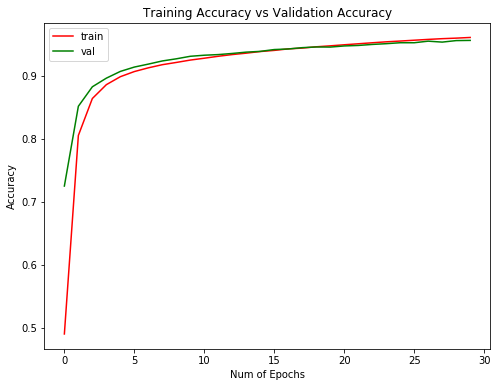

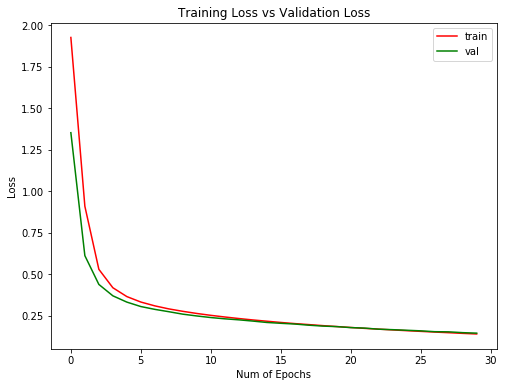

In [70]:
plt.figure(0)
plt.plot(mlp.history['acc'], 'r')
plt.plot(mlp.history['val_acc'], 'g')
plt.xticks(np.arange(0, 31, 5.0))
plt.rcParams['figure.figsize'] = (8,6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train', 'val'])

plt.figure(1)
plt.plot(mlp.history['loss'], 'r')
plt.plot(mlp.history['val_loss'], 'g')
plt.xticks(np.arange(0, 31, 5.0))
plt.rcParams['figure.figsize'] = (8,6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train', 'val'])

plt.show()

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

In [72]:
Y_pred = mlp_m.predict(X_test,verbose=2)
y_pred = np.argmax(Y_pred,axis=1)
# print Y_pred.shape
for ix in range(10):
    print ix, confusion_matrix(np.argmax(y_test,axis=1), y_pred)[ix].sum()
print confusion_matrix(np.argmax(y_test,axis=1), y_pred)

0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009
[[ 963    0    1    2    0    4    6    1    2    1]
 [   0 1111    2    2    1    1    4    2   12    0]
 [   7    3  986    5    7    0    2    8   12    2]
 [   0    2   16  947    0   14    1   11   16    3]
 [   1    1    7    0  936    0    7    2    4   24]
 [   8    1    1    6    2  849   10    0   11    4]
 [   9    3    3    0    7   10  922    0    4    0]
 [   1    8   18    5    4    2    0  969    2   19]
 [   3    2    2    9    8   10    7    5  924    4]
 [   7    5    2    4   19    4    1    7   10  950]]


<h1># Convolutional Neural Network </h1>

In [7]:
from keras.layers import Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras import backend as K
K.set_image_dim_ordering('th')

In [8]:
# fix random seed for reproducibility
seed = 3
np.random.seed(seed)

In [9]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(60000, 1, 28, 28) (60000,)
(10000, 1, 28, 28) (10000,)


In [10]:
# normalize inputs
X_train = X_train / 255
X_test = X_test / 255

# one hot encoding
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_op = y_test.shape[1]

print num_op

10


In [11]:
def cnn_model():
    # create model
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, border_mode='valid', input_shape=(1, 28, 28), activation='relu'))
    model.add(Convolution2D(32, 3, 3, border_mode='valid', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_op, activation='softmax'))
    # Compile Model
    model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [12]:
# cnn_m.summary()

In [13]:
cnn_m = cnn_model()
cnn = cnn_m.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=30, batch_size=256, verbose=2)


Train on 60000 samples, validate on 10000 samples
Epoch 1/30
21s - loss: 1.3027 - acc: 0.6380 - val_loss: 0.3843 - val_acc: 0.8911
Epoch 2/30
20s - loss: 0.4111 - acc: 0.8754 - val_loss: 0.3107 - val_acc: 0.9104
Epoch 3/30
22s - loss: 0.3459 - acc: 0.8964 - val_loss: 0.2634 - val_acc: 0.9240
Epoch 4/30
23s - loss: 0.3035 - acc: 0.9099 - val_loss: 0.2461 - val_acc: 0.9294
Epoch 5/30
24s - loss: 0.2705 - acc: 0.9205 - val_loss: 0.2047 - val_acc: 0.9401
Epoch 6/30
23s - loss: 0.2418 - acc: 0.9279 - val_loss: 0.1889 - val_acc: 0.9440
Epoch 7/30
24s - loss: 0.2198 - acc: 0.9334 - val_loss: 0.1696 - val_acc: 0.9507
Epoch 8/30
24s - loss: 0.2020 - acc: 0.9395 - val_loss: 0.1592 - val_acc: 0.9551
Epoch 9/30
25s - loss: 0.1865 - acc: 0.9435 - val_loss: 0.1460 - val_acc: 0.9576
Epoch 10/30
25s - loss: 0.1762 - acc: 0.9474 - val_loss: 0.1362 - val_acc: 0.9614
Epoch 11/30
26s - loss: 0.1646 - acc: 0.9511 - val_loss: 0.1320 - val_acc: 0.9625
Epoch 12/30
27s - loss: 0.1542 - acc: 0.9536 - val_loss: 

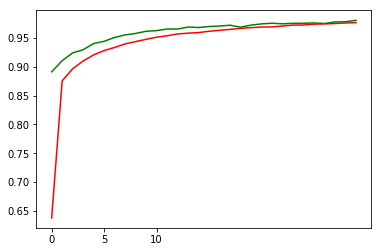

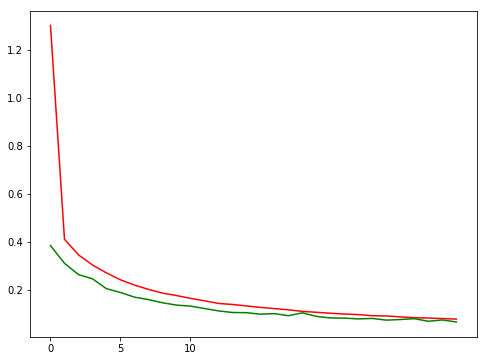

In [14]:
plt.figure(0)
plt.plot(cnn.history['acc'], 'r')
plt.plot(cnn.history['val_acc'], 'g')
plt.xticks(np.arange(0, 11, 5.0))
plt.rcParams['figure.figsize'] = (8,6)


plt.figure(1)
plt.plot(cnn.history['loss'], 'r')
plt.plot(cnn.history['val_loss'], 'g')
plt.xticks(np.arange(0, 11, 5.0))
plt.rcParams['figure.figsize'] = (8,6)


plt.show()

In [53]:
Y_pred = cnn_m.predict(X_test,verbose=2)
y_pred = np.argmax(Y_pred,axis=1)
# print Y_pred.shape
for ix in range(10):
    print ix, confusion_matrix(np.argmax(y_test,axis=1), y_pred)[ix].sum()
print confusion_matrix(np.argmax(y_test,axis=1), y_pred)

0 980
1 1135
2 1032
3 1010
4 982
5 892
6 958
7 1028
8 974
9 1009
[[ 969    0    0    2    0    3    4    1    1    0]
 [   0 1125    2    1    0    1    2    1    3    0]
 [   7    1  993    5    3    1    6    7    9    0]
 [   0    1    7  969    0   17    0    7    4    5]
 [   1    0    3    0  948    0   10    2    2   16]
 [   4    2    0    8    0  868    7    1    0    2]
 [   7    4    4    1    3   13  925    0    1    0]
 [   1    8   18    3    3    1    0  983    1   10]
 [   5    4    6   15    5   28    9    8  888    6]
 [   6    6    3   13   17    8    1    7    2  946]]
